In [1]:
# Hypothesis case Study

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from scipy import stats

## BUSINESS PROBLEM-1

In [3]:
os.chdir('C:\\Users\\DELL\\Downloads\\Python Notebook\\4. Basic Statistics - Hypothesis Testing')

In [4]:
Loans_data = pd.read_csv('LoansData.csv')

### EDA Analysis

In [5]:
Loans_data.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [6]:
Loans_data.shape

(2500, 14)

In [7]:
Loans_data.columns

Index(['Amount.Requested', 'Amount.Funded.By.Investors', 'Interest.Rate',
       'Loan.Length', 'Loan.Purpose', 'Debt.To.Income.Ratio', 'State',
       'Home.Ownership', 'Monthly.Income', 'FICO.Range', 'Open.CREDIT.Lines',
       'Revolving.CREDIT.Balance', 'Inquiries.in.the.Last.6.Months',
       'Employment.Length'],
      dtype='object')

In [8]:
Loans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount.Requested                2499 non-null   float64
 1   Amount.Funded.By.Investors      2499 non-null   float64
 2   Interest.Rate                   2498 non-null   object 
 3   Loan.Length                     2500 non-null   object 
 4   Loan.Purpose                    2500 non-null   object 
 5   Debt.To.Income.Ratio            2499 non-null   object 
 6   State                           2500 non-null   object 
 7   Home.Ownership                  2499 non-null   object 
 8   Monthly.Income                  2499 non-null   float64
 9   FICO.Range                      2498 non-null   object 
 10  Open.CREDIT.Lines               2497 non-null   float64
 11  Revolving.CREDIT.Balance        2497 non-null   float64
 12  Inquiries.in.the.Last.6.Months  24

In [9]:
Loans_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Amount.Requested,2499.0,12405.462185,7802.933666,1000.00,6000.0,10000.0,17000.0,35000.0
Amount.Funded.By.Investors,2499.0,12002.374186,7746.767348,-0.01,6000.0,10000.0,16000.0,35000.0
Monthly.Income,2499.0,5688.931321,3963.118185,588.50,3500.0,5000.0,6800.0,102750.0
Open.CREDIT.Lines,2497.0,10.072887,4.507416,2.00,7.0,9.0,13.0,38.0
Revolving.CREDIT.Balance,2497.0,15223.184622,18281.015258,0.00,5584.0,10948.0,18861.0,270800.0
Inquiries.in.the.Last.6.Months,2497.0,0.906688,1.231149,0.00,0.0,0.0,1.0,9.0


In [10]:
Loans_data.dtypes

Amount.Requested                  float64
Amount.Funded.By.Investors        float64
Interest.Rate                      object
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio               object
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                 float64
Revolving.CREDIT.Balance          float64
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
dtype: object

In [11]:
Loans_data['Interest.Rate'] = Loans_data['Interest.Rate'].str.replace('%', '').astype(float)

In [12]:
Loans_data['Loan.Length'] = Loans_data['Loan.Length'].str.replace('months', '').astype(int)

In [13]:
Loans_data['Debt.To.Income.Ratio'] = Loans_data['Debt.To.Income.Ratio'].str.replace('%', '').astype(float)

In [14]:
Loans_data.dtypes

Amount.Requested                  float64
Amount.Funded.By.Investors        float64
Interest.Rate                     float64
Loan.Length                         int32
Loan.Purpose                       object
Debt.To.Income.Ratio              float64
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                 float64
Revolving.CREDIT.Balance          float64
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
dtype: object

In [15]:
#Rename the columns of Loan data

Loans_data.rename(columns=lambda x: x.replace('.', '_'), inplace=True)

In [16]:
Loans_data.columns

Index(['Amount_Requested', 'Amount_Funded_By_Investors', 'Interest_Rate',
       'Loan_Length', 'Loan_Purpose', 'Debt_To_Income_Ratio', 'State',
       'Home_Ownership', 'Monthly_Income', 'FICO_Range', 'Open_CREDIT_Lines',
       'Revolving_CREDIT_Balance', 'Inquiries_in_the_Last_6_Months',
       'Employment_Length'],
      dtype='object')

In [17]:
#Checking the count of missing values 

Loans_data.isnull().sum()

Amount_Requested                   1
Amount_Funded_By_Investors         1
Interest_Rate                      2
Loan_Length                        0
Loan_Purpose                       0
Debt_To_Income_Ratio               1
State                              0
Home_Ownership                     1
Monthly_Income                     1
FICO_Range                         2
Open_CREDIT_Lines                  3
Revolving_CREDIT_Balance           3
Inquiries_in_the_Last_6_Months     3
Employment_Length                 77
dtype: int64

In [18]:
(Loans_data.isnull().sum())/len(Loans_data)*100

Amount_Requested                  0.04
Amount_Funded_By_Investors        0.04
Interest_Rate                     0.08
Loan_Length                       0.00
Loan_Purpose                      0.00
Debt_To_Income_Ratio              0.04
State                             0.00
Home_Ownership                    0.04
Monthly_Income                    0.04
FICO_Range                        0.08
Open_CREDIT_Lines                 0.12
Revolving_CREDIT_Balance          0.12
Inquiries_in_the_Last_6_Months    0.12
Employment_Length                 3.08
dtype: float64

In [19]:
#Drop the column Emplyment_Length

Loans_data.drop(columns=('Employment_Length'),axis=1,inplace=True)  

In [20]:
Loans_data.dropna(inplace=True)   #drop the missing values

In [21]:
Loans_data.shape

(2489, 13)

In [22]:
Loans_data.head(2)

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months
0,20000.0,20000.0,8.90,36,debt_consolidation,14.90,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0
1,19200.0,19200.0,12.12,36,debt_consolidation,28.36,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0


In [23]:
continuous_var = Loans_data.select_dtypes('number')
continuous_var.head(2)

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months
0,20000.0,20000.0,8.90,36,14.90,6541.67,14.0,14272.0,2.0
1,19200.0,19200.0,12.12,36,28.36,4583.33,12.0,11140.0,1.0


In [24]:
categorical_var = Loans_data.select_dtypes('object')
categorical_var.head(2)

,Loan_Purpose,State,Home_Ownership,FICO_Range
0,debt_consolidation,SC,MORTGAGE,735-739
1,debt_consolidation,TX,MORTGAGE,715-719


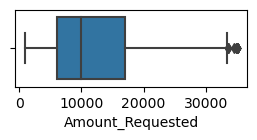

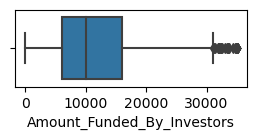

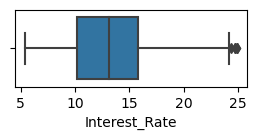

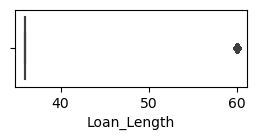

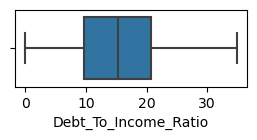

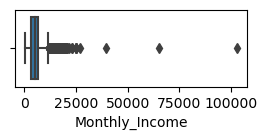

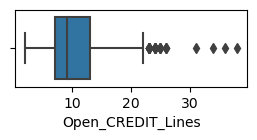

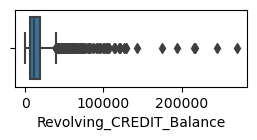

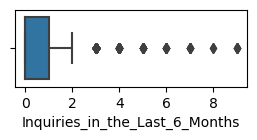

In [25]:
# Check for outliers

for i in continuous_var.columns:
    plt.figure(figsize=(3,1))
    sns.boxplot(data=Loans_data,x=i)
    plt.show() 

In [26]:
# Outlier treatment

In [27]:
def treat_outlier(x):
    q1=x.quantile(0.25)
    q3=x.quantile(0.75)
    iqr=q3-q1
    lr=q1-1.5*iqr
    ur=q3+1.5*iqr
    return x.clip(lower=lr,upper=ur)

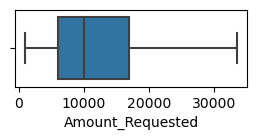

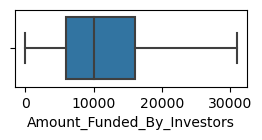

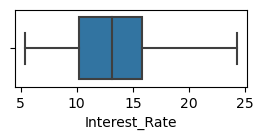

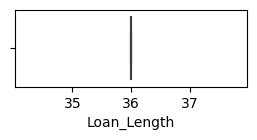

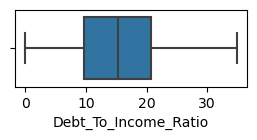

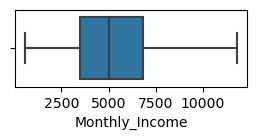

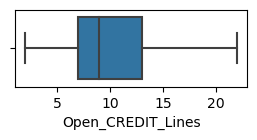

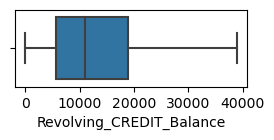

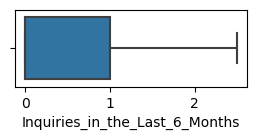

In [28]:
for i in continuous_var.columns:
    continuous_var[i]=treat_outlier(continuous_var[i])
    plt.figure(figsize=(3,1))
    sns.boxplot(data=continuous_var,x=i)
    plt.show() 

### Solutions to Buisness Problems

### 1(a). Intrest rate is varied for different loan amounts (Less interest charged for high loan amounts)

In [29]:
Loans_data.shape

(2489, 13)

In [30]:
Loans_data.columns

Index(['Amount_Requested', 'Amount_Funded_By_Investors', 'Interest_Rate',
       'Loan_Length', 'Loan_Purpose', 'Debt_To_Income_Ratio', 'State',
       'Home_Ownership', 'Monthly_Income', 'FICO_Range', 'Open_CREDIT_Lines',
       'Revolving_CREDIT_Balance', 'Inquiries_in_the_Last_6_Months'],
      dtype='object')

In [31]:
#Conduct the Pearson correlation test

#stats.pearsonr(Loans_data.Interest_Rate, Loans_data.Amount_Funded_By_Investors)

In [32]:
pvalue = 1.1396807200527619e-66
pcritical = 0.05

In [33]:
pvalue < pcritical

True

### 1(b). Loan length is directly effecting intrest rate.


In [34]:
#Conduct the Pearson correlation test

stats.pearsonr(Loans_data.Interest_Rate, Loans_data.Loan_Length)

PearsonRResult(statistic=0.4244808110067465, pvalue=1.9132344351583454e-109)

### 1(c). Interest rate varies for different purpose of loans

In [35]:
Loans_data.Loan_Purpose.unique()

array(['debt_consolidation', 'credit_card', 'other', 'moving', 'car',
       'vacation', 'home_improvement', 'house', 'major_purchase',
       'educational', 'medical', 'wedding', 'small_business',
       'renewable_energy'], dtype=object)

In [36]:
# data prep

# samples for each loan purposes
s1 = Loans_data.loc[Loans_data.Loan_Purpose == 'debt_consolidation', 'Interest_Rate' ]
s2 = Loans_data.loc[Loans_data.Loan_Purpose == 'credit_card', 'Interest_Rate' ]
s3 = Loans_data.loc[Loans_data.Loan_Purpose == 'other', 'Interest_Rate' ]
s4 = Loans_data.loc[Loans_data.Loan_Purpose == 'moving', 'Interest_Rate' ]
s5 = Loans_data.loc[Loans_data.Loan_Purpose == 'car', 'Interest_Rate' ]
s6 = Loans_data.loc[Loans_data.Loan_Purpose == 'vacation', 'Interest_Rate' ]
s7 = Loans_data.loc[Loans_data.Loan_Purpose == 'home_improvement', 'Interest_Rate' ]
s8 = Loans_data.loc[Loans_data.Loan_Purpose == 'house', 'Interest_Rate' ]
s9 = Loans_data.loc[Loans_data.Loan_Purpose == 'major_purchase', 'Interest_Rate' ]
s10 = Loans_data.loc[Loans_data.Loan_Purpose == 'educational', 'Interest_Rate' ]
s11 = Loans_data.loc[Loans_data.Loan_Purpose == 'medical', 'Interest_Rate' ]
s12 = Loans_data.loc[Loans_data.Loan_Purpose == 'wedding', 'Interest_Rate' ]
s13 = Loans_data.loc[Loans_data.Loan_Purpose == 'small_business', 'Interest_Rate' ]
s14 = Loans_data.loc[Loans_data.Loan_Purpose == 'renewable_energy', 'Interest_Rate' ]

In [37]:
#Step4: Perform the F-Test or Anova as we have more than 2 columns

stats.f_oneway( s1, s2, s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14)

F_onewayResult(statistic=7.487175499510107, pvalue=1.1346364693350775e-14)

In [38]:
pvalue=1.1346364693350775e-14
pcritical=0.05
pvalue < pcritical

True

### 1(d). There is relationship between FICO scores and Home Ownership. It means that, People with owning home will have high FICO scores.


In [39]:
Loans_data.columns

Index(['Amount_Requested', 'Amount_Funded_By_Investors', 'Interest_Rate',
       'Loan_Length', 'Loan_Purpose', 'Debt_To_Income_Ratio', 'State',
       'Home_Ownership', 'Monthly_Income', 'FICO_Range', 'Open_CREDIT_Lines',
       'Revolving_CREDIT_Balance', 'Inquiries_in_the_Last_6_Months'],
      dtype='object')

In [40]:
Fico = Loans_data.FICO_Range.str.split('-',expand=True).astype('float64')
Fico.columns = ('Low','High')
Loans_data['Fico'] = (Fico.Low + Fico.High)/2

In [41]:
Loans_data.head(2)

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Fico
0,20000.0,20000.0,8.90,36,debt_consolidation,14.90,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,737.0
1,19200.0,19200.0,12.12,36,debt_consolidation,28.36,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,717.0


In [42]:
s1 = Loans_data.loc[Loans_data.Home_Ownership == 'MORTGAGE','Fico']
s2 = Loans_data.loc[Loans_data.Home_Ownership == 'RENT','Fico']
s3 = Loans_data.loc[Loans_data.Home_Ownership == 'OWN','Fico']
s4 = Loans_data.loc[Loans_data.Home_Ownership == 'OTHER','Fico']

In [43]:
#Step4: Perform the Annova test

stats.f_oneway(s1,s2,s3,s4)

F_onewayResult(statistic=23.067768208374645, pvalue=1.001016973422469e-14)

In [44]:
pvalue=1.001016973422469e-14
pvalue

1.001016973422469e-14

In [45]:
pcritical = 0.05
pvalue < pcritical

True

## BUSINESS PROBLEM - 2

In [46]:
price = pd.read_csv('Price_Quotes.csv')

#### EDA Analysis

In [47]:
price.head(2)

,Order_Number,Barry_Price,Mary_Price
0,1,126,114
1,2,110,118


In [48]:
price.shape

(12, 3)

In [49]:
price.dtypes

Order_Number    int64
Barry_Price     int64
Mary_Price      int64
dtype: object

In [50]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Order_Number  12 non-null     int64
 1   Barry_Price   12 non-null     int64
 2   Mary_Price    12 non-null     int64
dtypes: int64(3)
memory usage: 420.0 bytes


In [51]:
#Checking null values
(price.isnull().sum())/len(price)*100

Order_Number    0.0
Barry_Price     0.0
Mary_Price      0.0
dtype: float64

###  2.We would like to assess if there is any difference in the average price quotes provided by Mary and Barry.

In [52]:
print('Average priceprovided by Barry:',price.Barry_Price.mean())

Average priceprovided by Barry: 124.33333333333333


In [53]:
print('Average priceprovided by Barry:',price.Mary_Price.mean())

Average priceprovided by Barry: 114.75


In [54]:
#Conduct the ttext as sample size is less than 30

In [55]:
stats.ttest_rel(price.Barry_Price , price.Mary_Price)

TtestResult(statistic=2.5213765108923494, pvalue=0.02840588045242053, df=11)

In [56]:
pvalue=0.02840588045242053
pcritical : 0.05
pvalue < pcritical

True

## BUISNESS PROBLEM 3: 

- Reengineer: Whether the month was before (Prior) or after (Post) reengineering
- EmployeeTurnover: The percentage of employees who quit in a givenmonth, out of the total number of employees
- TRFF(%): The percentage of residents who were temporarily removed from the facility, out of the total number of residents
- CI (%): The percentage of critical incident reports written that month, out ofthe total number of residents

### Determine what effect, if any, the reengineering effort had on the incidence behavioral problems and staff turnover. i.e To determine if the reengineering effort changed the critical incidence rate. Is there evidence that the critical incidence rate improved?

In [57]:
Treat_Facility = pd.read_csv('Treatment_Facility.csv')

#### EDA Analysis

In [58]:
Treat_Facility.head(2)

,Month,Reengineer,Employee_Turnover,VAR4,VAR5
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452


In [59]:
Treat_Facility.shape

(20, 5)

In [60]:
Treat_Facility.dtypes

Month                  int64
Reengineer            object
Employee_Turnover    float64
VAR4                 float64
VAR5                 float64
dtype: object

In [61]:
Treat_Facility.isnull().sum()

Month                0
Reengineer           0
Employee_Turnover    0
VAR4                 0
VAR5                 0
dtype: int64

In [62]:
Treat_Facility.rename(columns=({'VAR4':'TRFF','VAR5':'CI'}),inplace=True)

In [63]:
prior = Treat_Facility.loc[Treat_Facility.Reengineer == 'Prior','CI']
post =  Treat_Facility.loc[Treat_Facility.Reengineer == 'Post','CI']

In [64]:
stats.ttest_ind(prior, post)

TtestResult(statistic=1.627914425352865, pvalue=0.12091989189884148, df=18.0)

In [65]:
pvalue=0.12091989189884148
pcritical : 0.05
pvalue < pcritical

False

## BUSINESS PROBLEM 4: 

In [66]:
prior_ass = pd.read_csv('Priority_Assessment.csv')

#### EDA Analysis 

In [67]:
prior_ass.head(2)

,Days,Priority
0,3.3,High
1,7.9,Medium


In [68]:
prior_ass.shape

(642, 2)

In [69]:
prior_ass.columns

Index(['Days', 'Priority'], dtype='object')

In [70]:
prior_ass.dtypes

Days        float64
Priority     object
dtype: object

In [71]:
prior_ass.isnull().sum()   #Checking the null values

Days        0
Priority    0
dtype: int64

### We will focus on the prioritization system. If the system is working, thenhigh priority jobs, on average, should be completed more quickly than medium priority jobs,and medium priority jobs should be completed more quickly than low priority jobs. Use thedata provided to determine whether thisis, in fact, occurring

In [72]:
s1 = prior_ass.loc[prior_ass.Priority=='High','Days']
s2 = prior_ass.loc[prior_ass.Priority=='Medium','Days']
s3 = prior_ass.loc[prior_ass.Priority=='Low','Days']

In [73]:
#Conduct the f-test as we have more than 2 samples

stats.f_oneway(s1,s2,s3)

F_onewayResult(statistic=1.812311010076072, pvalue=0.16411459461716182)

In [74]:
pvalue=0.16411459461716182
pcritical : 0.05
pvalue < pcritical

False

## BUSINESS PROBLEM 5: 
- Gender The patron’s gender: 1 = male; 2 = female
- Marital Status The patron’s marital status: 1 = married; 2 = single
- Age The patron’s age in years: 1= 1-12; 2 = 13-30; 3 = 31-60; 4 = 60+
- Income The patron’s annual household income: 1 = Less than $50,000; 2 = $50-$100,000; 3 = $100,000+
- Hear About The patron’s response to this question: “How did you hear about Filmon the Rocks?” Respondents could check any of     the following that applied: 1 = television; 2 =
  newspaper; 3 = radio; 4 = website; 5 = word of mouth


In [75]:
Films = pd.read_csv('Films.csv')

#### EDA Analysis

In [76]:
Films.head(2)

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5


In [77]:
Films.shape

(330, 11)

In [78]:
Films.columns

Index(['_rowstate_', 'Movie', 'Gender', 'Marital_Status', 'Sinage', 'Parking',
       'Clean', 'Overall', 'Age', 'Income', 'Hear_About'],
      dtype='object')

In [79]:
Films['Overall'].unique()

array([ 2.,  1.,  5.,  3.,  4., nan])

In [80]:
Films.dtypes

_rowstate_          int64
Movie              object
Gender             object
Marital_Status     object
Sinage            float64
Parking           float64
Clean             float64
Overall           float64
Age               float64
Income            float64
Hear_About         object
dtype: object

In [81]:
Films.isnull().sum()

_rowstate_         0
Movie              0
Gender             0
Marital_Status     2
Sinage             2
Parking            2
Clean              3
Overall            2
Age                2
Income            16
Hear_About         7
dtype: int64

In [82]:
# Income column has null values
for var in Films.columns:
    Films[var].fillna(value = Films[var].mode()[0], inplace=True)

In [83]:
def gender (x):
    if x.Gender == 'Male' :
        return '1'
    elif x.Gender == 'Female'  :
        return '0'
    elif x.Gender == '1'  :
        return '1'
    else :
        return '0'

In [84]:
#converting males to 1 and females to 0 
Films.Gender = Films.apply(gender, axis=1)

In [85]:
def married_status (x):
    if x.Marital_Status == 'Married' :
        return '1'
    elif x.Marital_Status == 'Single'  :
        return '0'
    elif x.Marital_Status == '1'  :
        return '1'
    else :
        return '0'

In [86]:
#converting married to 1 and singles to 0
Films.Marital_Status = Films.apply(married_status, axis=1)

### 5(a) What is the overall level of customer satisfaction?

In [87]:
mean = Films.Overall.mean()

In [88]:
std = Films.Overall.std()

In [89]:
SE = std/(np.sqrt(Films.shape[0]))

In [90]:
mean-(1.96*SE)

1.5469994901816928

In [91]:
mean+(1.96*SE)

1.6954247522425494

In [92]:
#With 95% confidence levels,the overall level of customer satisfaction will be in the range (1.5469994901816928,1.6954247522425494)

### 5(b)What factors are linked to satisfaction?

In [94]:
observed1 = pd.crosstab( Films.Sinage,Films.Overall )

In [95]:
#Conduct the chi-square

t5 = stats.chi2_contingency(observed1)

In [96]:
t5.pvalue

4.53298970003405e-19

In [97]:
t5.statistic

125.61859671027881

In [98]:
# conclusion
# Reject the Null Hypothesis
# with increase in sinage rating overall staifaction is also increases

In [99]:
observed2 = pd.crosstab( Films.Parking,Films.Overall )

In [100]:
t6 = stats.chi2_contingency(observed2)

In [101]:
t6.pvalue

4.783162283608494e-40

In [102]:
t6.statistic

230.61691663391676

In [103]:
# conclusion
# Reject the Null Hypothesis
# with increase in sinage rating overall staifaction is also increases

### 5(c) What is the demographic profile of Film on the Rocks patrons?

In [104]:
#For gender
gender = Films.groupby('Gender')[['Gender']].count()
gender = gender.rename( columns={'Gender': 'count'}).reset_index()
gender['Prob'] = gender['count'] / gender['count'].sum()
gender

,Gender,count,Prob
0,0,213,0.645455
1,1,117,0.354545


In [105]:
#This shows that 64% audience if Female

In [106]:
# For Marital  Status

Marital_Status = Films.groupby('Marital_Status')[['Marital_Status']].count()
Marital_Status = Marital_Status.rename(columns={'Marital_Status' : 'count'}).reset_index()
Marital_Status['Prob'] = Marital_Status['count']/Marital_Status['count'].sum()
Marital_Status

,Marital_Status,count,Prob
0,0,230,0.69697
1,1,100,0.30303


In [107]:
# This shows that 69% audience is single

In [108]:
#For Income basis

Income = Films.groupby('Income')[['Income']].count()
Income = Income.rename(columns={'Income' : 'count'}).reset_index()
Income['Prob'] = Income['count']/Income['count'].sum()
Income

,Income,count,Prob
0,1.0,158,0.478788
1,2.0,82,0.248485
2,3.0,90,0.272727


In [109]:
#This shows that 47% auience has income less than 50K

In [110]:
# On Age basis

In [111]:
Age = Films.groupby('Age')[['Age']].count()
Age = Age.rename(columns={'Age' : 'count'}).reset_index()
Age['Prob'] = Age['count']/Age['count'].sum()
Age

,Age,count,Prob
0,1.0,26,0.078788
1,2.0,177,0.536364
2,3.0,117,0.354545
3,4.0,10,0.030303


In [112]:
#This shows that the age of 53% audience is between 13-30

### 5(d) In what media outlet(s) should the film series be advertised?

In [113]:
Hear_About = Films.groupby('Hear_About')[['Hear_About']].count()
Hear_About = Hear_About.rename(columns={'Hear_About' : 'count'}).reset_index()
Hear_About['Prob'] = Hear_About['count']/Hear_About['count'].sum()
Hear_About.sort_values(by='Prob',ascending=False)

,Hear_About,count,Prob
9,5,233,0.706061
7,4,41,0.124242
0,1,22,0.066667
4,3,14,0.042424
2,2,12,0.036364
3,"2,5",2,0.006061
5,"3,4",2,0.006061
1,"1,5",1,0.003030
6,"3,5",1,0.003030
8,"4,5",1,0.003030


In [114]:
#This shows that there is 70% probability that the audiance heard about the film series solely through word of mouth